<a href="https://colab.research.google.com/github/Ashu-Az/Iosd/blob/main/Iosd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1
* Implement kernel SVM for classification and provide a comparative study using different kernels(linear, polynomial, gaussian, sigmoid, RBF etc) using precision and f1-scores.

# Importing necesassary libraries

In [84]:
import pandas as p
import numpy as n
import seaborn as s
import matplotlib.pyplot as m
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [85]:
df = p.read_csv("/neo.csv")
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [87]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [88]:
df.shape

(90836, 10)

In [89]:
df.count()

id                    90836
name                  90836
est_diameter_min      90836
est_diameter_max      90836
relative_velocity     90836
miss_distance         90836
orbiting_body         90836
sentry_object         90836
absolute_magnitude    90836
hazardous             90836
dtype: int64

In [90]:
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,NaN,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,NaN,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,NaN,-0.264168,0.042302
sentry_object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,NaN,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,NaN,-0.365267,1.000000


# dropping columns which have very less correlation with the target variable

In [91]:
df.drop('name', inplace=True, axis=1) # Name attribute does not affect the training of the model
df.drop('sentry_object', inplace=True, axis=1) # As it have all values NaN we can remove the column entirely
df.drop('orbiting_body', inplace=True, axis=1)# In this attribute the values are same for all rows so we can drop it as it will not contribute in training

In [92]:
df.dtypes

id                      int64
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object

# Plotting correlation heatmap

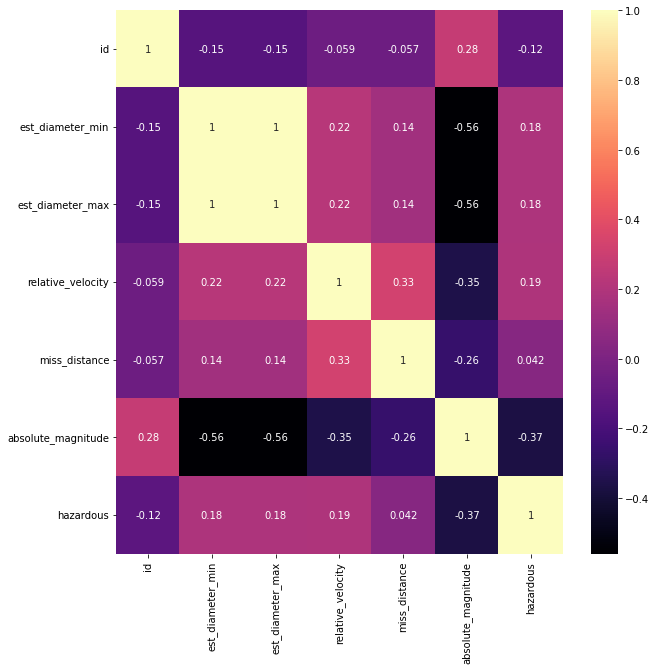

In [93]:
m.figure(figsize=(10,10))
s.heatmap(df.corr(), annot = True , cmap= "magma")

# ANALYSATION
* Here as we can see every attribute is poorely correlated to the target variable , but miss_distance is very weakly related to all of them 

In [94]:
df.isnull().sum() # checking null values

id                    0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [95]:
print(df['hazardous'].value_counts())
print(df.dtypes)

False    81996
True      8840
Name: hazardous, dtype: int64
id                      int64
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object


# Dividing columns


In [96]:
hazardous = p.get_dummies(df["hazardous"])
hazardous.head()

,False,True
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


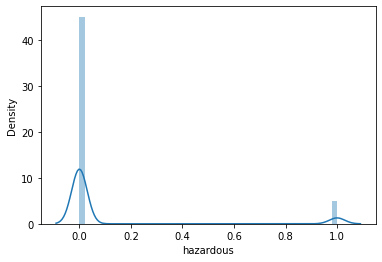

In [97]:
s.distplot(df["hazardous"])

# Concatenating the new columns


In [98]:
df = p.concat([df , hazardous], axis = 1)
df.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,False,True
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False,1,0
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True,0,1
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False,1,0
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False,1,0
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True,0,1


In [99]:
# dropping False columns as True attribute is enough to determine the target variable as 0 means false
df.drop([False], axis = 1 , inplace = True)
df.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,True
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False,0
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True,1
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False,0
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False,0
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True,1


In [100]:
# now dropping hazardous columns as we encoded the attribute to two columns

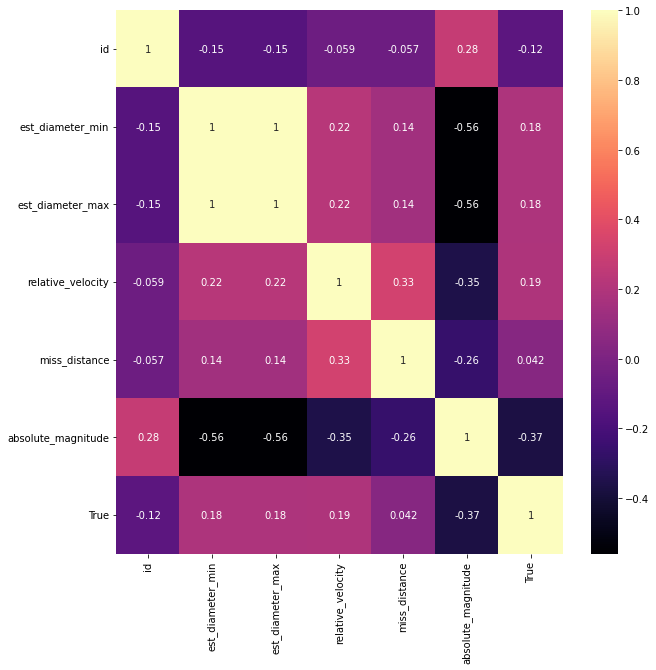

In [101]:
df.drop(['hazardous'], axis = 1 , inplace = True) # checking the correlation heatmap again
m.figure(figsize=(10,10))
s.heatmap(df.corr(), annot = True , cmap= "magma")

In [102]:

df.head()


,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,True
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


In [103]:
df.describe()


,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,True
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103,0.097318
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086,0.296392
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000,0.000000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000,0.000000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000,0.000000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000,0.000000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000,1.000000


# Statistical analysation
* Here the count attributes is same for all that means there is no missing values
* As we can see the mean and standard deviation for 'est_diameter_max','relative_velocity','miss_distance','absolute_magnitude' is relatively high that means the data points vary higly from the mean , there is lots of inconsistency in the dataset , as id attribute is only a primary key in the dataset , we are not worry about its statiscal information , The variation maybe because of the outlier or maybe the data is largely scattered from the mean



# Data visualization

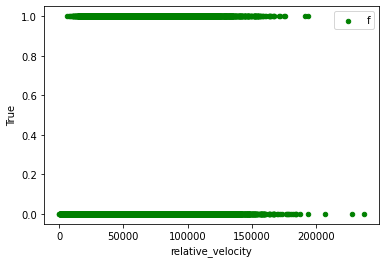

In [104]:
bx = df.plot(kind='scatter', x='relative_velocity',y= True ,color = 'Green',label ='f')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


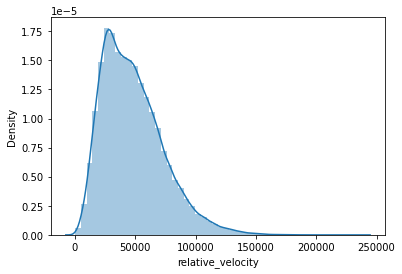

In [105]:
s.distplot(df["relative_velocity"])

* With respect to our target variable the distribution of the relative_velocity attribute is quite satisfying as the data distribution is ok 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


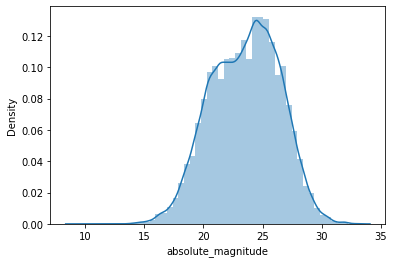

In [106]:
s.distplot(df["absolute_magnitude"])

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


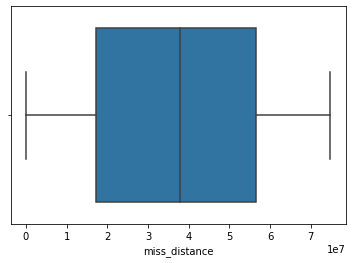

In [107]:
print(s.boxplot(df["miss_distance"]))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


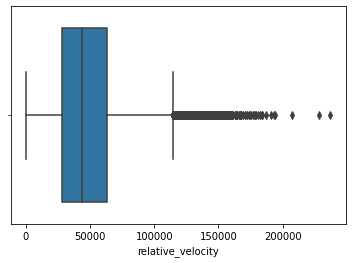

In [108]:
print(s.boxplot(df["relative_velocity"]))


* In relative_velocity as we can see there is lot of outliers far from the concetrated value points , that's there was variation of standard deviation from the mean

* Here as we can see in the miss_distance attribute the data is not skewed 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


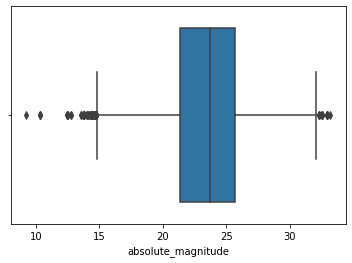

In [109]:
print(s.boxplot(df["absolute_magnitude"]))

* In absolute_magnitude as we can see there is lot of outliers far from the concetrated value points

In [110]:
df["relative_velocity"].mean()

48066.918917642935

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


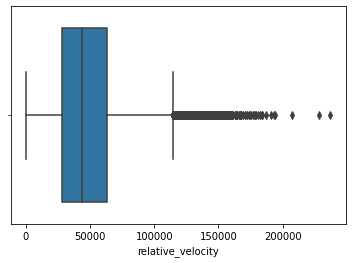

In [111]:
print(s.boxplot(df["relative_velocity"]))


# Spilting train and test values 
* with 70% test size

In [114]:
x = df.drop([True], axis = 1)
y = df[True].astype(int)
print(x.shape)
print(y.shape)

(90836, 6)
(90836,)


In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=4) 

# Support vector machine
* Using linear kernel

In [116]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear' , gamma = 'auto', C =2)

# scaling the train and test variable as it will take lot of time to train 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [117]:
classifier.fit(X_train,y_train) # Training the svm model

SVC(C=2, gamma='auto', kernel='linear')

In [118]:
y_predict= classifier.predict(X_test)


In [119]:
print(X_train.shape)
print(X_test.shape)

(63585, 6)
(27251, 6)


In [120]:
from sklearn.metrics import classification_report

In [121]:
print(classification_report(y_test,y_predict))
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     24599
           1       0.00      0.00      0.00      2652

    accuracy                           0.90     27251
   macro avg       0.45      0.50      0.47     27251
weighted avg       0.81      0.90      0.86     27251

0.9026824703680599


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Using rbf The radial kernel

In [135]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC()

In [137]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9108289604051227

In [138]:
df.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,True
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


In [139]:
print(classification_report(y_test,y_predict))
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     24599
           1       0.00      0.00      0.00      2652

    accuracy                           0.90     27251
   macro avg       0.45      0.50      0.47     27251
weighted avg       0.81      0.90      0.86     27251

0.9026824703680599


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Using polynomial kernel

# TASK 2
### BUILDING ARITIFICIAL NEURAL NETWORK

* Using tensorflow and keras

In [122]:

import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([keras.layers.Dense(6, input_shape=(6,), activation='relu'),keras.layers.Dense(15, activation='relu'),keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1988/1988 [==============================] - 4s 2ms/step - loss: 0.2362 - accuracy: 0.9015
Epoch 2/100
1988/1988 [==============================] - 3s 2ms/step - loss: 0.1959 - accuracy: 0.9077
Epoch 3/100
1988/1988 [==============================] - 3s 2ms/step - loss: 0.1899 - accuracy: 0.9109
Epoch 4/100
1988/1988 [==============================] - 3s 2ms/step - loss: 0.1883 - accuracy: 0.9115
Epoch 5/100
1988/1988 [==============================] - 4s 2ms/step - loss: 0.1877 - accuracy: 0.9119
Epoch 6/100
1988/1988 [==============================] - 3s 2ms/step - loss: 0.1874 - accuracy: 0.9121
Epoch 7/100
1988/1988 [==============================] - 3s 2ms/step - loss: 0.1870 - accuracy: 0.9120
Epoch 8/100
1988/1988 [==============================] - 4s 2ms/step - loss: 0.1868 - accuracy: 0.9116
Epoch 9/100
1988/1988 [==============================] - 3s 2ms/step - loss: 0.1865 - accuracy: 0.9121
Epoch 10/100
1988/1988 [==============================] - 3s 2ms/step - l

In [123]:
model.evaluate(X_test, y_test)

852/852 [==============================] - 1s 1ms/step - loss: 0.1798 - accuracy: 0.9139


[0.17977727949619293, 0.913948118686676]

# predicting the test values 

In [124]:
yp = model.predict(X_test)
yp[:5]

array([[1.2128205e-20],
       [3.3440515e-09],
       [1.3912562e-24],
       [3.5809121e-01],
       [2.5779536e-01]], dtype=float32)

In [125]:
y_pred = [] # making an empty list 
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [126]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [127]:
y_test[:10]

67434    0
33984    0
82717    0
16614    0
8987     0
15658    0
81429    0
50064    0
41365    1
42953    0
Name: True, dtype: int64

In [128]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     24599
           1       0.72      0.19      0.30      2652

    accuracy                           0.91     27251
   macro avg       0.82      0.59      0.63     27251
weighted avg       0.90      0.91      0.89     27251



Text(69.0, 0.5, 'Truth')

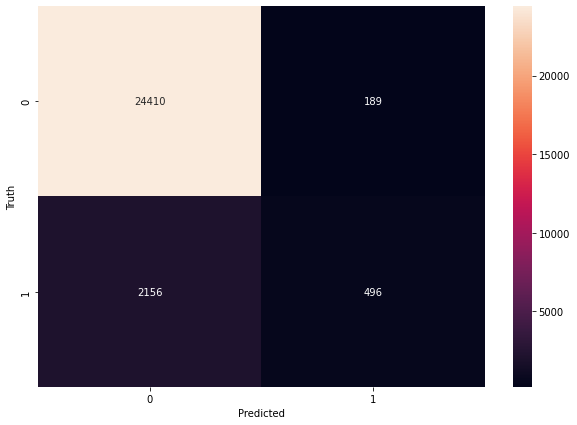

In [129]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

m.figure(figsize = (10,7))
s.heatmap(cm, annot=True, fmt='d')
m.xlabel('Predicted')
m.ylabel('Truth')

# Accuracy test score

In [130]:
round((24484+391)/(24484+391+2261+115),2)

0.91

# Precision for not hazardous object

In [131]:
round(24484/(24484+2261),2)

0.92

# Precision for hazardous object

In [132]:
round(391/(391+115),2)

0.77

# Recall for not hazarous object

In [133]:
round(24484/(24484+115),2)

1.0

# Recall for hazarous object

In [134]:
round(391/(391+2261),2)

0.15